# APROXIMACIÓN DE LAS RAÍCES EN UN CASO PARTICULAR DE LA  

# ECUACIÓN DE BERNOULLI MEDIANTE EL MÉTODO DE BÚSQUEDA 

# INCREMENTAL:

En este ejercicio se busca hallar las raíces de ecuación de Bernoulli para el ﬂujo de un ﬂuido en un canal abierto con una pequeña protuberancia. Esta ecuación es:

# $ \frac{Q^2}{2 g b^2 h_0 ^2} + h_0=\frac{Q^2}{2 g b^2 h^2} +h + H$

En donde se definen: $Q=1.2 m^3 /s$ (tasa de volumen de ﬂujo), $g = 9.81 m/s$ (aceleración gravitatoria), $b = 1.8 m$ (ancho del canal), $h_0 = 0.6 m$ (el nivel de agua), $H = 0.075 m$ (altura de protuberancia) y $h$ como la altura a determinar.





En otras palabras, lo que queremos determinar es determinar a qué altura $h$ se cumple la ecuación planteada anteriormente mediante el método de búsqueda incremental.

# Sobre la teoría del algoritmo implementado:

Los métodos numéricos para hallar raíces consisten en resolver ecuaciones no lineales que presentan una gran dificultad para conseguir las soluciones. En este proyecto solo nos centraremos en un sistema bidimensional de valores reales en el plano cartesiano.

La manera numérica en la que se resuelven los sistemas antes mencionados gira en torno al problema de encontrar una constante $a$ tal que evaluando la función asociada al sistema (de la forma $f(x)$) en este punto, se obtenga que $f(x = a) = 0$. 

Para ello, planteamos una sucesión $x_0 , x_1 , ... , x_{(n-1)} , x_n$, tal que el término $x_0$ es la propuesta inicial sobre dónde está la raíz, una primer suposición, tal que su n-ésimo valor sea una aproximación al valor de la raíz real.

Del argumento anterior, se desprenden varios métodos, pero en este caso usaremos uno de los métodos más populares llamado:
búsqueda incremental.

# ¿En qué consiste el método de búsqueda incremental?:

Consiste en el proceso de "prueba y error". Tenemos que caminar paso a paso, con un paso infinitesimal $dx$ a lo largo de la dirección $+x$, probando si hay raíz o no; esto mediante analizar si hubo un cambio de signo en la función evaluada en dos puntos (que hemos denotado como $x_0$ y $x_1$), los cuales delimitarán nuestro intervalo a analizar. Es decir, el cambio de signo es la herramienta principal para ver si hay una raíz en el intervalo $[x_0, x_1]$.

Se presenta un esquema ilustrativo para visualizar el proceso descrito:

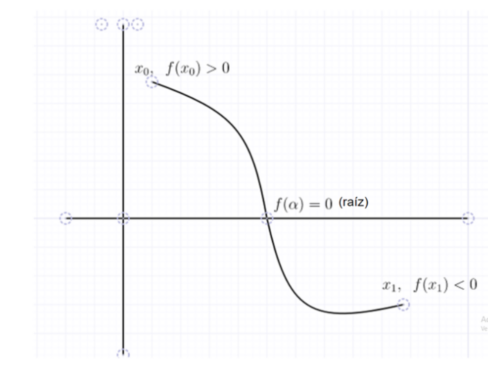

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

direc = r'C:\Users\abrah\Documents\Documentos\Documents\Documents\Progra\github\computacional\Incremental.png'
img = mpimg.imread(direc)
plt.imshow(img)
plt.axis('off')  
plt.show()

De lo anterior, si $f(x_0) \cdot f(x_1) < 0$, hubo un cambio de signo y notamos que hay raíz en ese intervalo.
Para buscar este cambio de signo se implementa un algoritmo como sigue:

Definiendo el punto de partida $x_0 = a$ (con $f(x_0) = f_0$), damos un paso: $x_1 = a + dx$ (con
$f(x_1) = f_1$), reduciendo los pasos del algoritmo. Si $f_0 \cdot f_1 < 0$, tenemos raíz en $[x_0, x_1]$. Si $f_0 \cdot f_1 > 0$, no hay raíz, entonces avanzamos reasignando nuestras variables como sigue: $x_0 = x_1$, $x_1 = x_0 + dx$, hasta que se cumpla la condición del cambio de signo tal que $x_1$ sea la aproximación de nuestra raíz. A continuación se adjunta un esquema ilustrativo:


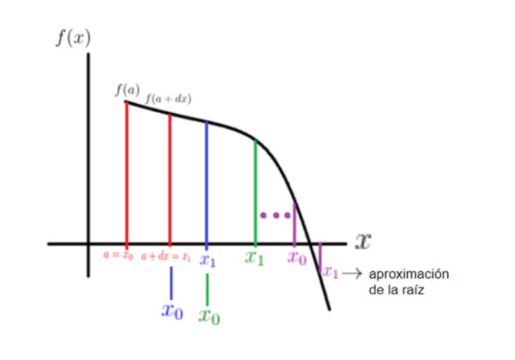

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
direc = r'C:\Users\abrah\Documents\Documentos\Documents\Documents\Progra\github\computacional\aprox.png'
img = mpimg.imread(direc)
plt.imshow(img)
plt.axis('off')  
plt.show()

# Sobre el código:

Como la aproximación de la raíz (que denotamos como $x_1$) va a depender del tamaño del paso ($dx$),
la idea es ir en pasos pequeños, ya que, desde luego al ser una aproximación, va a haber implicado un
error porcentual. Con esto, llegar a un intervalo $[x_0, x_1]$ que cumpla la condición del cambio de signo
y ahí parar el código, siendo $x_1$ mi raíz aproximada, y mostrando también un contador referente al
número de pasos. En este caso para coincidir con la notación acostumbrada, manejaré la notación de
la variable $h$ como $x$.

Para obtener las raíces de la ecuación de Bernoulli planteada, elegí el intervalo basándome visualmente
en un gráfico que adjunto a continuación. Me centro en las dos raíces positivas, pues hay una raíz negativa que he despreciado, ya que un espesor negativo de la protuberacia carece de sentido físico.

# Gráfico auxiliar para la elección del intervalo:

Definimos las constantes asociadas al sistema:

In [3]:
Q = 1.2 #m^3/s
g = 9.81 #m/s^2
b = 1.8 #m
h_0=0.6 #m 
H = 0.075 #

Definimos una constante auxiliar:

In [4]:
A = ((Q**2)/(2*g*(b**2)*(h_0**2)) + h_0 - H)/((Q**2)/(2*g*(b**2)))
print(A)

25.953902777777785


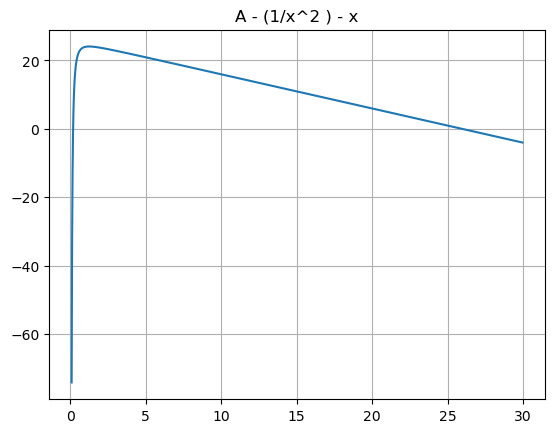

In [6]:
from math import *
from pylab import *
import matplotlib.pyplot as plt

lista_x = []
lista_xt = []
a,b = 0.1,30.0
N = 1000.0
h = (b-a)/N
for x in arange(a,b,h):
    lista_x.append(x)
    a = A - 1/x**2 - x
    lista_xt.append(a)
    

plt.plot(lista_x,lista_xt)
grid()
plt.title("A - (1/x^2 ) - x")
plt.show()

# Búsqueda incremental:

In [7]:
def incremental(f,a,b,dx):
    x0=a;f0=f(x0)
    x1=x0+dx
    f1=f(x1)
    contador=0.0
    while f0*f1>0.0:
        if x1>=b: return ('No se encontró raíz. Prueba con un intervalo diferente. \n') 
        x0=x1;f0=f1
        x1=x0+dx;f1=f(x1)
        contador=contador+1 # cuenta el número de pasos
    return [x1,contador]

Primer raíz:

In [9]:
def f(x):
    return A - 1/x**2 - x
print(incremental(f,0.1,0.5,1e-8))

[0.19703959994892264, 9703959.0]


Segunda raíz:

In [10]:
def f(x):
    return A - 1/x**2 - x
print(incremental(f,24,26,1e-6))

[25.952419002007, 1952418.0]


# RESULTADOS:

Primera raíz: cuando $h=0.19703959994892264$ m

Se llegó en $9703959$ pasos

Segunda raíz: cuando $h=25.952419002007$ m 

Se llegó en $1952418$ pasos